Available countries:
 - Afghanistan
 - Albania
 - Algeria
 - Andorra
 - Angola
 - Antigua and Barbuda
 - Argentina
 - Armenia
 - Australia
 - Austria
 - Azerbaijan
 - Bahamas
 - Bahrain
 - Bangladesh
 - Barbados
 - Belarus
 - Belgium
 - Belize
 - Benin
 - Bhutan
 - Bolivia
 - Bosnia and Herzegovina
 - Botswana
 - Brazil
 - Brunei
 - Bulgaria
 - Burkina Faso
 - Burma
 - Burundi
 - Cabo Verde
 - Cambodia
 - Cameroon
 - Canada
 - Central African Republic
 - Chad
 - Chile
 - China
 - Colombia
 - Comoros
 - Congo (Brazzaville)
 - Congo (Kinshasa)
 - Costa Rica
 - Cote d'Ivoire
 - Croatia
 - Cuba
 - Cyprus
 - Czechia
 - Denmark
 - Diamond Princess
 - Djibouti
 - Dominica
 - Dominican Republic
 - Ecuador
 - Egypt
 - El Salvador
 - Equatorial Guinea
 - Eritrea
 - Estonia
 - Eswatini
 - Ethiopia
 - Fiji
 - Finland
 - France
 - Gabon
 - Gambia
 - Georgia
 - Germany
 - Ghana
 - Greece
 - Grenada
 - Guatemala
 - Guinea
 - Guinea-Bissau
 - Guyana
 - Haiti
 - Holy See
 - Honduras
 - Hungary
 - Icela

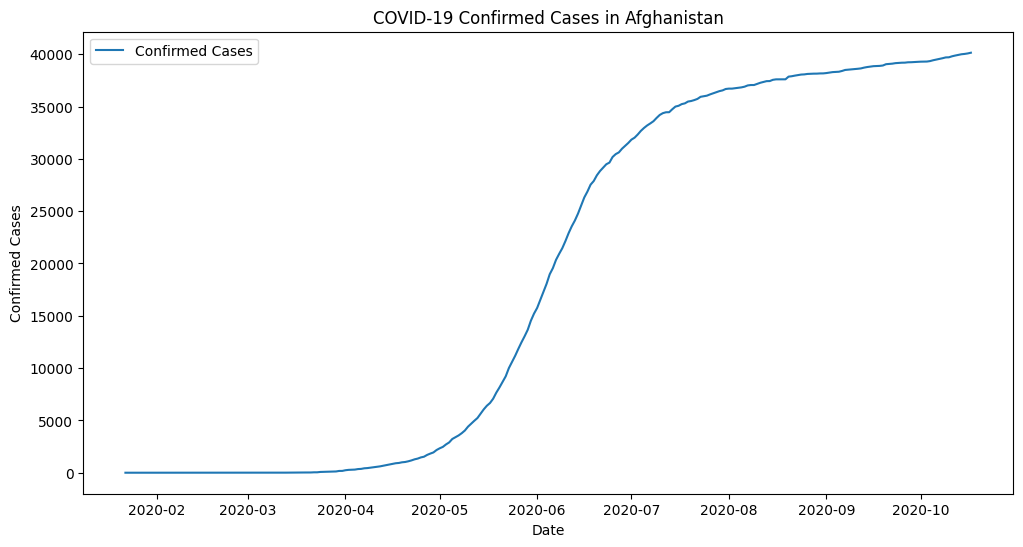

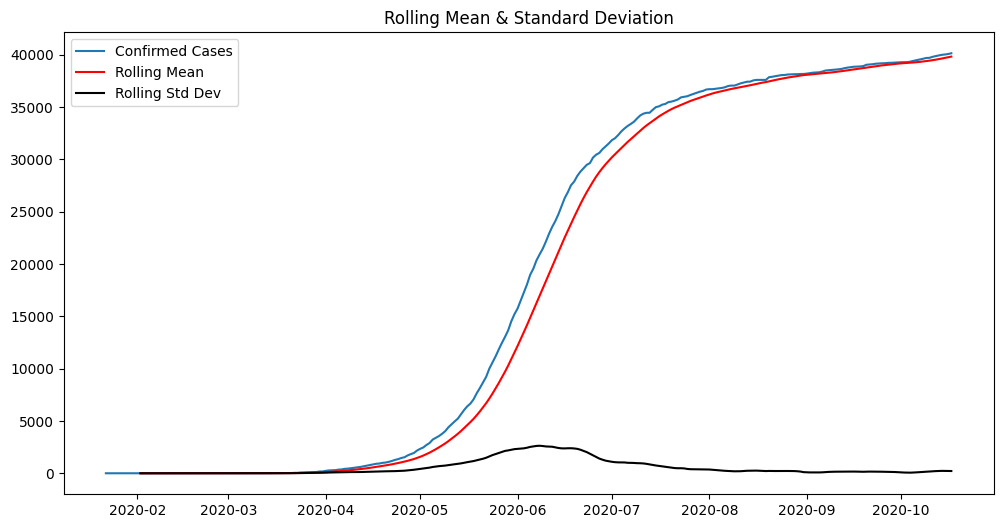


Performing Augmented Dickey-Fuller Test:
   1%: -3.4564641849494113
   5%: -2.873032730098417
   10%: -2.572894516864816
ADF Statistic: -0.9586833979786316
p-value: 0.7680338623232827

The data is likely non-stationary (fail to reject null hypothesis).

Performing ADF Test on Differenced Data:
ADF Statistic (Differenced): -2.5137774056267945
p-value (Differenced): 0.11215801915717283

Even after differencing, the data is still non-stationary.


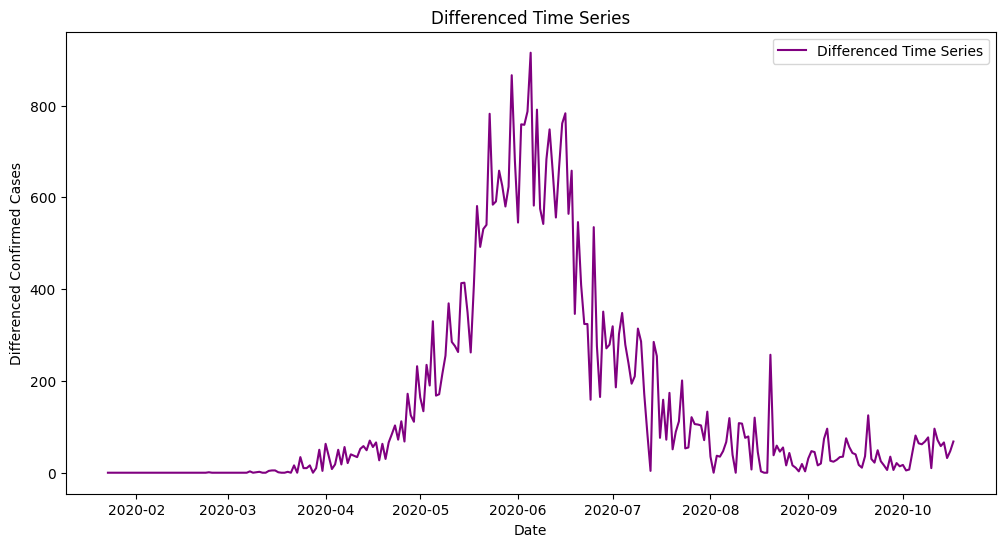

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from google.colab import files
import io

# Load the dataset
file_path = "/content/time-series-19-covid-combined.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Display available countries
unique_countries = df['Country/Region'].unique()
print("Available countries:")
for country in unique_countries:
    print(f" - {country}")

# Ask user to select a country
country = input("\nEnter the country for time-series analysis: ").strip()

# Normalize input for case insensitivity
country = country.lower()
df['Country/Region'] = df['Country/Region'].str.lower()

# Filter data for the selected country
if country not in df['Country/Region'].values:
    print(f"\nError: Country '{country}' not found in dataset. Please check spelling and try again.")
else:
    country_df = df[df['Country/Region'] == country].groupby('Date').sum()

    if country_df.empty:
        print("\nError: No data available for the selected country.")
    else:
        # Extract confirmed cases
        ts = country_df['Confirmed']

        # Plot the original time series
        plt.figure(figsize=(12,6))
        plt.plot(ts, label="Confirmed Cases")
        plt.title(f"COVID-19 Confirmed Cases in {country.capitalize()}")
        plt.xlabel("Date")
        plt.ylabel("Confirmed Cases")
        plt.legend()
        plt.show()

        # Compute rolling statistics
        rolling_mean = ts.rolling(window=12).mean()
        rolling_std = ts.rolling(window=12).std()

        # Plot rolling statistics
        plt.figure(figsize=(12,6))
        plt.plot(ts, label="Confirmed Cases")
        plt.plot(rolling_mean, label="Rolling Mean", color='red')
        plt.plot(rolling_std, label="Rolling Std Dev", color='black')
        plt.title("Rolling Mean & Standard Deviation")
        plt.legend()
        plt.show()

        # Perform Augmented Dickey-Fuller test
        print("\nPerforming Augmented Dickey-Fuller Test:")
        adf_test = adfuller(ts.dropna())
        adf_results = {"ADF Statistic": adf_test[0], "p-value": adf_test[1], "Critical Values": adf_test[4]}

        # Display ADF test results
        for key, value in adf_results["Critical Values"].items():
            print(f"   {key}: {value}")
        print(f"ADF Statistic: {adf_results['ADF Statistic']}")
        print(f"p-value: {adf_results['p-value']}")

        # Interpretation
        if adf_results['p-value'] < 0.05:
            print("\nThe data is likely stationary (reject null hypothesis).")
        else:
            print("\nThe data is likely non-stationary (fail to reject null hypothesis).")

            # Apply first-order differencing if non-stationary
            ts_diff = ts.diff().dropna()

            # Re-run ADF test on differenced data
            print("\nPerforming ADF Test on Differenced Data:")
            adf_test_diff = adfuller(ts_diff)
            print(f"ADF Statistic (Differenced): {adf_test_diff[0]}")
            print(f"p-value (Differenced): {adf_test_diff[1]}")

            if adf_test_diff[1] < 0.05:
                print("\nAfter differencing, the data is now stationary.")
            else:
                print("\nEven after differencing, the data is still non-stationary.")

            # Plot differenced series
            plt.figure(figsize=(12,6))
            plt.plot(ts_diff, label="Differenced Time Series", color='purple')
            plt.title("Differenced Time Series")
            plt.xlabel("Date")
            plt.ylabel("Differenced Confirmed Cases")
            plt.legend()
            plt.show()
